# 信号处理仿真与应用 - 数字和模拟滤波器 - 数字滤波器分析

## islinphase

#### 线性和非线性相位

**线性相位FIR滤波器**

[ 0.00358648  0.00781895 -0.03745797 -0.03341132  0.28559328  0.54774118
  0.28559328 -0.03341132 -0.03745797  0.00781895  0.00358648]
True


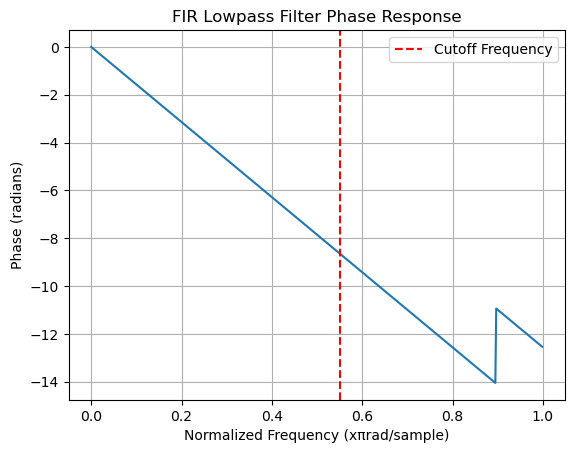

In [40]:
import numpy as np  
import matplotlib.pyplot as plt  
from scipy import signal  

def is_linear_phase(b):
    N = len(b)
    
    # 序列长度为偶数
    if N % 2 == 0:
        if np.allclose(b, b[::-1]):
            return True  # 滤波器系数偶对称，属于线性相位滤波器
        elif np.allclose(b, -b[::-1]):
            return True  # 滤波器系数奇对称，属于线性相位滤波器
        return False
        
    elif N % 2 != 0:
    # 序列长度为奇数
        middle_index = N // 2  
        # 检查是否偶对称或奇对称  
        if np.allclose(b[:middle_index], b[middle_index + 1:][::-1]):  
            return True  
        elif np.allclose(b[:middle_index], -b[middle_index + 1:][::-1]):  
            return True  
        else:  
            return False
        
    else:  
        return False   
  
# 设计参数  
N = 11  # 滤波器阶数加1（因为firwin的N是滤波器系数的数量）  
cutoff_freq = 0.55  # 归一化截止频率 (0到1之间)  
window = 'hamming'  # 窗函数类型  
  
# 使用firwin设计FIR滤波器  
b = signal.firwin(N, cutoff_freq, window=window)  
print(b)  
# 滤波器系数a总是为[1]对于FIR滤波器  
a = [1]  
  
# 计算并绘制频率响应  
w, h = signal.freqz(b, a)  
frequencies = w / np.pi  # 将角频率转换为归一化频率  
# amplitudes = 20 * np.log10(np.abs(h))  # 转换为分贝  
  
# 绘制幅度响应  
# plt.figure()  
# plt.plot(frequencies, amplitudes)  
# plt.title('FIR Lowpass Filter Frequency Response')  
# plt.xlabel('Normalized Frequency (xπrad/sample)')  
# plt.ylabel('Amplitude (dB)')  
# plt.grid(True)  
# plt.ylim([-100, 5])  
# plt.axvline(x=cutoff_freq, color='r', linestyle='--', label='Cutoff Frequency')  
# plt.legend()  
  
# 绘制相位响应  
phase = np.unwrap(np.angle(h))  
plt.figure()  
plt.plot(frequencies, phase)  
plt.title('FIR Lowpass Filter Phase Response')  
plt.xlabel('Normalized Frequency (xπrad/sample)')  
plt.ylabel('Phase (radians)')  
plt.grid(True)  
plt.axvline(x=cutoff_freq, color='r', linestyle='--', label='Cutoff Frequency')  
plt.legend()  


# 函数示例使用  
print(is_linear_phase(b))  # 应该输出True 



**进一步验证函数编写是否正确**

In [37]:
import numpy as np  
 
def is_linear_phase(b):
    N = len(b)
    
    # 序列长度为偶数
    if N % 2 == 0:
        if np.allclose(b, b[::-1]):
            return True  # 滤波器系数偶对称，属于线性相位滤波器
        elif np.allclose(b, -b[::-1]):
            return True  # 滤波器系数奇对称，属于线性相位滤波器
        return False 
    
    elif N % 2 != 0:
    # 序列长度为奇数
        middle_index = N // 2  
        # 检查是否偶对称或奇对称  
        if np.allclose(b[:middle_index], b[middle_index + 1:][::-1]):  
            return True  
        elif np.allclose(b[:middle_index], -b[middle_index + 1:][::-1]):  
            return True  
        else:  
            return False
        
    else:  
        return False   
    
#进一步验证
c = np.array([0.1, 0.2, 0.3, 0.4, 0.3, -0.2, -0.1])  
print(is_linear_phase(c))  
c_1 = np.array([0.1, 0.2, 0.3,  -0.3, -0.2, -0.1]) 
print(is_linear_phase(c_1))  

False
True


**非线性相位滤波器**

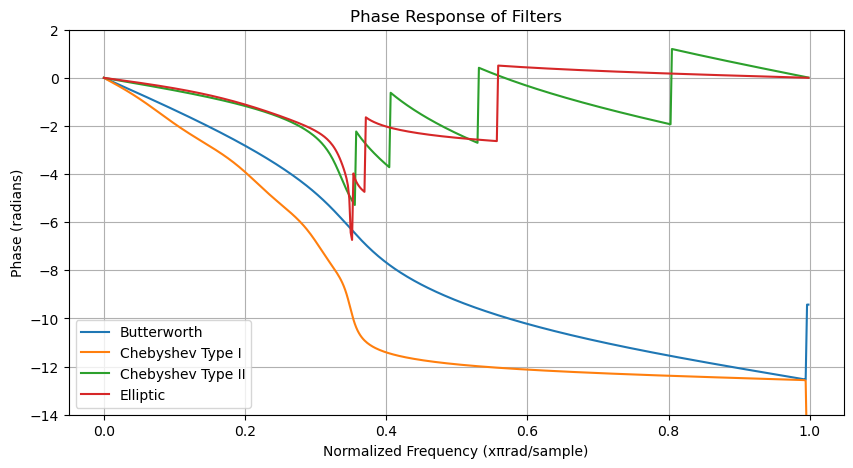

In [38]:
import numpy as np  
import matplotlib.pyplot as plt  
from scipy import signal  
  
# 参数设置  
ord = 8  
Wcut = 0.35  
atten = 20  
rippl = 1  
  
# Butterworth滤波器  
b, a = signal.butter(ord, Wcut)  
w, h = signal.freqz(b, a)  
phase_butter = np.unwrap(np.angle(h))  

# Chebyshev Type I滤波器  
b, a = signal.cheby1(ord, rippl, Wcut, btype='low', analog=False)  
w, h = signal.freqz(b, a)  
phase_cheby1 = np.unwrap(np.angle(h))  

# Chebyshev Type II滤波器  
b, a = signal.cheby2(ord, atten, Wcut, btype='low', analog=False)  
w, h = signal.freqz(b, a)  
phase_cheby2 = np.unwrap(np.angle(h))  

# Elliptic滤波器  
b, a = signal.ellip(ord, rippl, atten, Wcut, btype='low', analog=False)  
w, h = signal.freqz(b, a)  
phase_ellip = np.unwrap(np.angle(h))  
  
# 绘制相位响应  
plt.figure(figsize=(10, 5))  
plt.plot(w/np.pi, phase_butter, label='Butterworth')  
plt.plot(w/np.pi, phase_cheby1, label='Chebyshev Type I')  
plt.plot(w/np.pi, phase_cheby2, label='Chebyshev Type II')  
plt.plot(w/np.pi, phase_ellip, label='Elliptic')  
  
plt.ylim([-14, 2])  
plt.xlabel('Normalized Frequency (xπrad/sample)')  
plt.ylabel('Phase (radians)')  
plt.grid(True)  
plt.legend(loc='best')  
plt.title('Phase Response of Filters')  
plt.show()